# Aprendizado Dinâmico


por **Cibele Russo**

**ICMC/USP - São Carlos SP**



## Programa

1. **Séries temporais**: Conceitos básicos. Sazonalidade, tendência. Suavização e Alisamento exponencial.
2. **Séries estacionárias**.
3. Função de **autocovariância e autocorrelação**.
4. **Modelos: ARMA, ARIMA, SARIMA**: Identificação, Estimação, Previsão, Diagnósticos.
5. **Modelos estruturais**: espaço de estado e previsão Bayesiana.
6. **Previsão de séries temporais**: Método theta, Método theta expandido.
7. **Redes Dinâmicas**: Representação, manipulação e visualização, Caracterização de redes dinâmicas, Modelagem de redes dinâmicas.
8. **Análise de Sobrevivência**: Peculiaridades dos dados, Estimação não paramétrica, Funções de sobrevivências usuais, Ajuste de modelos, Modelos de longa duração, Regressão em análise de sobrevivência

**Referências:**

1. **Morettin, P.A.; Toloi, C.M.C. Análise de Séries Temporais - Modelos lineares univariados. Blucher, 2018.**
2. Eric D. Kolaczyk, Gábor Csárdi. Statistical Analysis of Network Data with R, Springer. 2014.
3. Paul S.P. Cowpertwait, Andrew V. Metcalfe. Introductory Time Series with R, Springer. 2009.
4. Louzada-Neto, F. ; Mazucheli, J. ; Achcar, J.A. . Análise de Sobrevivência e Confiabilidade. Lima, Peru: Instituto de Matematicas y Ciencias Afines, IMCA, 2002.
5. Colosimo, E. A. ; Giolo, S. R. Análise de Sobrevivência Aplicada. Blucher, 2006.
6. Hyndman, R. ; Athanasopoulos, G. Forecasting: Principles and Practice. OTexts, 2018.
7. Ehlers, R.S. Análise de Séries Temporais. ICMC USP. 2009.


... e outras referências que serão citadas ao longo do curso.


# Aula 1.    Séries temporais



## Programa

a. Conceitos básicos.

b. Visualização de séries temporais.

c. Sazonalidade, tendência.

d. Suavização e Alisamento exponencial.

### O que é uma série temporal?

**<span style="color:darkred">Uma série temporal é qualquer conjunto de observações ordenadas no tempo.</span>**

**Exemplos**

- valores diários de poluição na cidade de São Paulo

- número de óbitos diários registrados por COVID-19 no Brasil

- índices diários da Bovespa

- registro de marés no porto de Santos


**Objetivos**

São objetivos gerais dos estudos de séries temporais:

- Identificar padrões como tendência, sazonalidade, observações discrepantes (outliers);

- Usar a variação passada de uma série para predizer valores futuros. Embora não seja possível prever exatamente os valores futuros, podemos predizer um comportamento aproximado das próximas observações;

- Entender a variação conjunta de duas séries, e utilizar uma série para explicar a variação em outra série.

#### Para uma série temporal, observações vizinhas estão correlacionadas. Se em modelos de regressão a ordem das observações não importa, em modelos de séries temporais a ordem dos dados é crucial (Ehlers, 2009).

Algumas características são particulares a esse tipo de dados, por exemplo:


- Observações correlacionadas são mais difíceis de analisar e requerem técnicas específicas.

- Precisamos levar em conta a ordem temporal das observações.

- Fatores complicadores como presenca de tendências e variação sazonal ou cíclica podem ser difíceis de estimar ou remover.

- A seleção de modelos pode ser bastante complicada, e as ferramentas podem ser de difícil interpretação.

- É mais difıcil de lidar com observações perdidas e dados discrepantes devido à natureza sequencial.


## Motivação - Séries Temporais

### Exemplo: Dados de COVID-19 no estado de SP

Fonte dos dados originais: Brasil.IO: boletins epidemiológicos da COVID-19 por município por dia, disponível em: [https://brasil.io/datasets/](https://brasil.io/datasets/) (acesso em 08/03/2021,
utilizados dados até 31/12/2020). A partir dos dados originais, diversas bases de dados com registros de casos e óbitos por cidades brasileiras foram obtidas e serão disponibilizadas para estudo.

In [1]:
# Carrega as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [2]:
# Leitura dos dados

url = 'https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidSP.csv'

covidSP = pd.read_csv(url, parse_dates=True, index_col=0)
covidSP.head()

,confirmed,deaths
date,,
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,1,0
2020-02-29,0,0
2020-03-01,0,0


In [3]:
covidSP.tail()

,confirmed,deaths
date,,
2020-12-26,1253,13
2020-12-27,2836,55
2020-12-28,1576,39
2020-12-29,12477,293
2020-12-30,11849,282


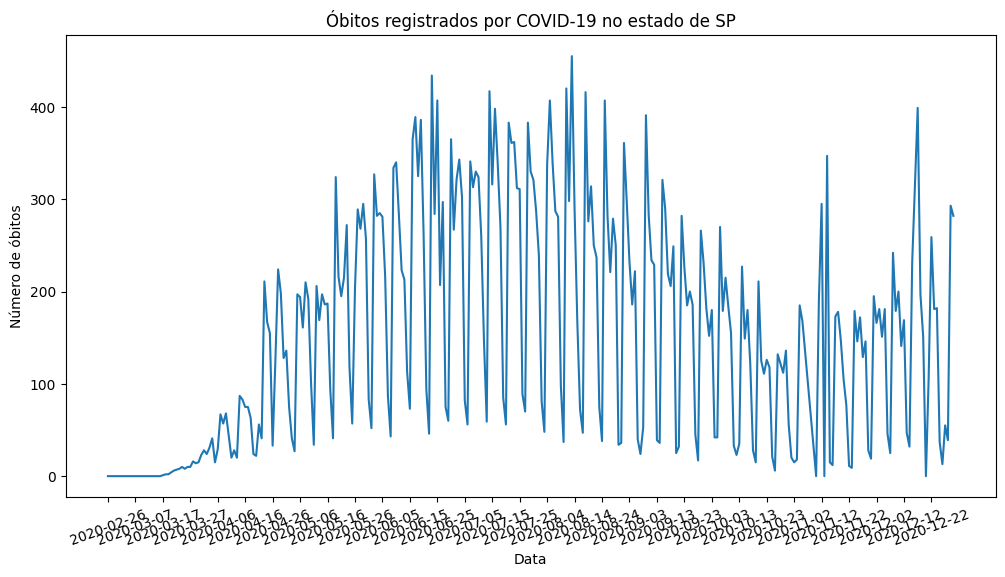

In [4]:
# COVID - Considere agora os dados de mortes diárias

y = covidSP['deaths']
x = covidSP.index

plt.rcParams['figure.figsize'] = [12,6]

plt.rc('font', size=10) # Altera o tamanho da fonte
plt.plot(x,y,label="Real data") # Plota os dados

plt.xticks(np.arange(x.min(),x.max(),10, dtype='datetime64[D]'),rotation=20)
plt.title("Óbitos registrados por COVID-19 no estado de %s" % 'SP')
plt.xlabel("Data")
plt.ylabel("Número de óbitos")
plt.ylim()
plt.show()


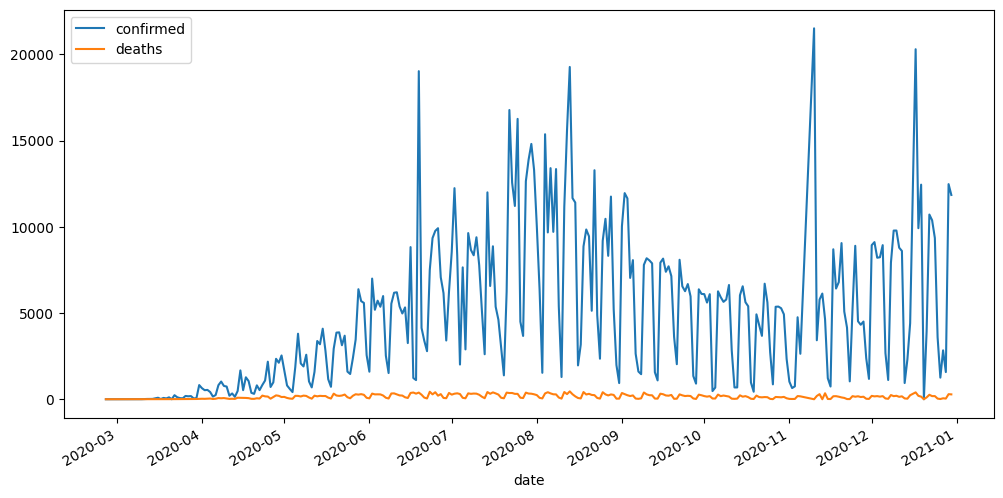

In [5]:
covidSP.plot();


**Exercícios**

1. Mesmo antes das definições formais, o que você entende por **tendência** e **sazonalidade** dos dados nesse caso?

2. Por que elas ocorrem?

3. Faça a leitura e gráfico de mortes diárias por COVID-19 para o estado do RJ (disponível em https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidRJ.csv).


### Motivação - Tendência e Sazonalidade

Considere o problema de decompor a série de mortes em **tendência, sazonalidade e resíduos (ruído)**. São conceitos que veremos adiante, mas usamos este problema para motivar o estudo de séries temporais.

In [6]:
# Instale o pacote statsmodels se necessário
#!pip show statsmodels

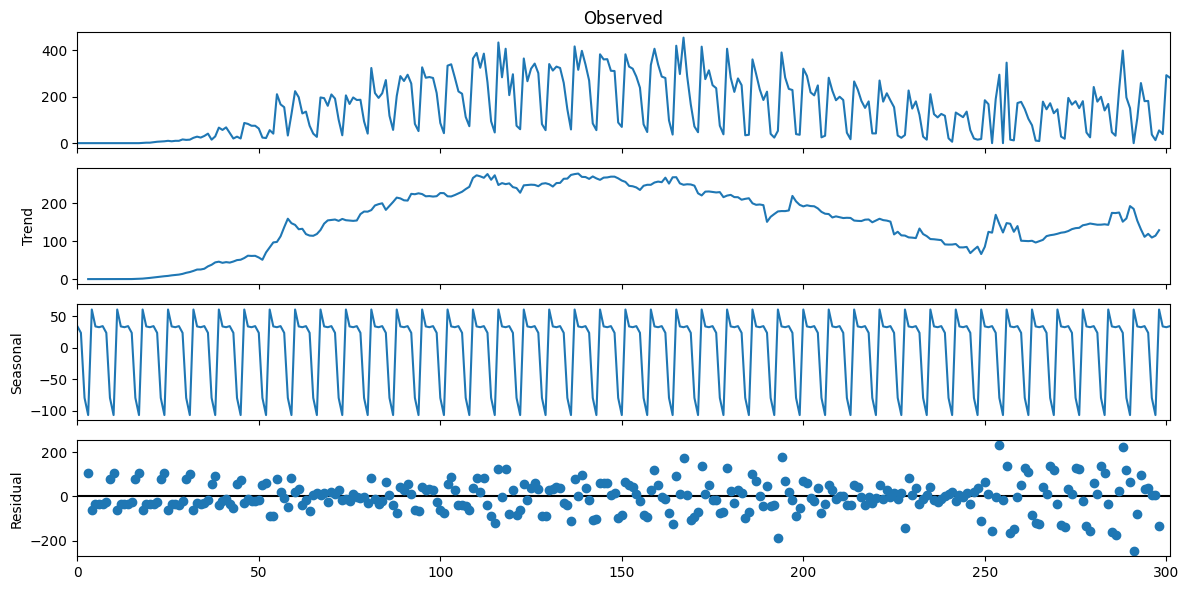

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

# y aqui são as mortes em SP

mortes = np.array(y)

result = seasonal_decompose(mortes, model='additive', period=7)
result.plot()

pyplot.show()

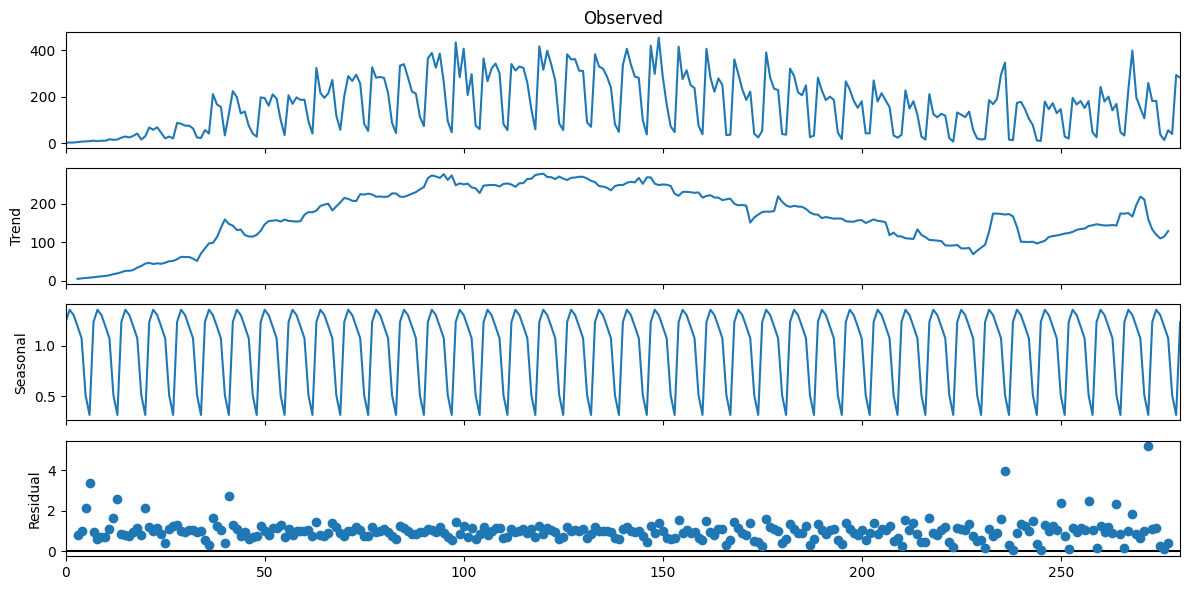

In [8]:
mortes = np.array(y)
mortes_pos = mortes[mortes>0]

result = seasonal_decompose(mortes_pos, model='multiplicative', period=7)
result.plot()

pyplot.show()

## Lidando com datas

In [9]:
covidSP.index

DatetimeIndex(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06',
               ...
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='date', length=302, freq=None)

**Caso o índice não seja do tipo DatetimeIndex, algumas alternativas podem ser utilizadas:**


In [10]:
idx = pd.date_range('25/2/2020', periods=7, freq='D')
idx

DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02'],
              dtype='datetime64[ns]', freq='D')

In [11]:
idx = pd.date_range('25/02/2020', periods=7, freq='M')
idx

DatetimeIndex(['2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31'],
              dtype='datetime64[ns]', freq='M')

In [12]:
idx = pd.to_datetime(['Feb 02, 2020', '2/25/2020', '25-Feb-2020', None], dayfirst=False, format='mixed')
print(idx)

DatetimeIndex(['2020-02-02', '2020-02-25', '2020-02-25', 'NaT'], dtype='datetime64[ns]', freq=None)


In [13]:
datas = np.array(['2020-02-25', '2020-02-26', '2020-02-27'], dtype='datetime64[D]')
datas

array(['2020-02-25', '2020-02-26', '2020-02-27'], dtype='datetime64[D]')

In [14]:
idx = pd.DatetimeIndex(datas)
idx

DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27'], dtype='datetime64[s]', freq=None)

**Existem outras possibilidades!**

In [15]:
covidSP['deaths']

date
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
2020-03-01      0
             ... 
2020-12-26     13
2020-12-27     55
2020-12-28     39
2020-12-29    293
2020-12-30    282
Name: deaths, Length: 302, dtype: int64

<Axes: xlabel='date'>

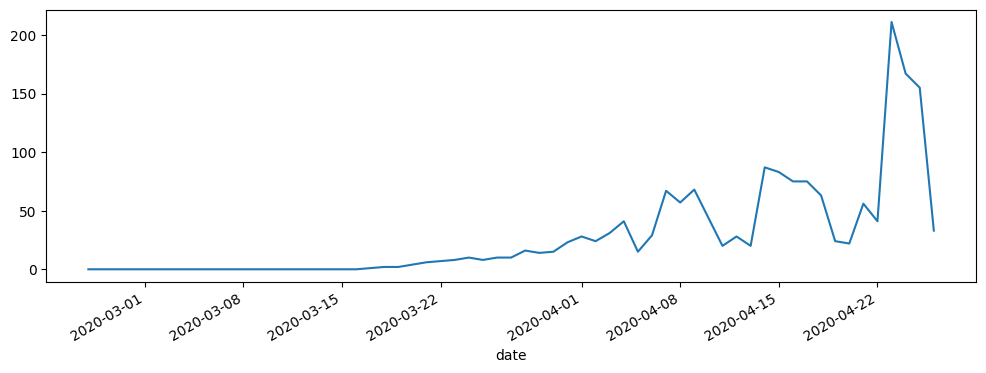

In [16]:
# Visualizando apenas uma parte da série

covidSP['deaths']['2020-02-26':'2020-04-26'].plot(figsize=(12,4))

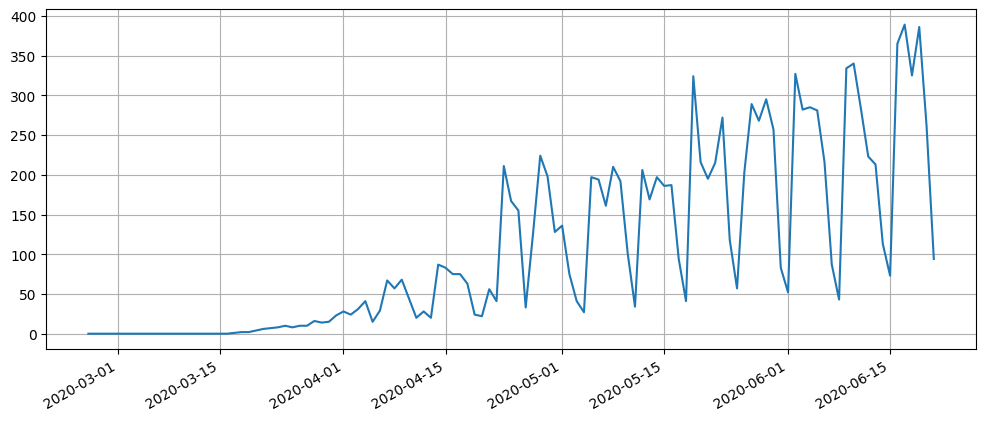

In [17]:
# Adicionando linhas de grade ao gráfico

ax=covidSP['deaths']['2020-02-26':'2020-06-21'].plot(figsize=(12,5))
ax.set(xlabel='')

ax.xaxis.grid(True)
ax.yaxis.grid(True)

# Conceitos básicos

## Processos estocásticos

Os modelos utilizados para descrever séries temporais são processos estocásticos. Em geral, assume-se que uma **série temporal observada é uma realização de um processo estocástico adjacente**.


**Definição**

Seja $T$ um conjunto arbitrário. Um _processo estocástico_ é uma família $Z = \{Z(t), t\in T\}$ tal que, para cada $t\in T$, $Z(t)$ é uma variável aleatória.


Um processo estocástico pode ser visto como uma família de variáveis aleatórias. Por outro lado, uma realização ou trajetória do processo estocástico pode ser visto como uma **série temporal**.



O **espaço de estados** de um processo estocástico é o conjunto de todos os possíveis valores que as variáveis aleatórias $Z(t)$ podem assumir.

Os processos estocásticos podem ser **discretos**, por exemplo, o número de chamadas telefônicas que chega a uma central em duas horas, ou **contínuo**, por exemplo o preço de um ativo financeiro.

Poderíamos descrever um processo estocástico por meio da distribuição de probabilidade conjunta de $Z(t_1),\ldots,Z(t_k)$, mas aqui abordaremos o assunto de uma forma um pouco mais simples. Vamos portanto utilizar as funções (para o caso contínuo)

- Média: $\mu(t) = E(Z(t))$

- Variância: $\sigma^2(t) = Var(Z(t))$

- Autocovariância: $\gamma(t_1,t_2) = E[Z(t_1)-\mu(t_1)][Z(t_2)-\mu(t_2)]$



### Alguns exemplos de processos estocásticos conhecidos

- Sequência aleatória

- Ruído branco

- Passeio aleatório


### Sequência aleatória

Considere $\{X_n,n=1,2,\ldots\}$ uma sequência de v.a. definidas no mesmo espaço amostral $\Omega$. Aqui, $\mathcal{T}=\{1,2,\ldots\}$ e temos um processo com parâmetro discreto, ou uma sequência aleatória. Para todo $n\geq 1$, podemos escrever

$$P(X_1=a_1,\ldots,X_n=a_n) = P(X_1=a_1)P(X_2=a_2|X_1=a_1)\ldots P(X_n=a_n|X_1=a_1,\ldots,X_{n-1}=a_{n-1})$$

### Ruído branco (white noise)

Dizemos que $\{\epsilon_t,t\in \mathbb{Z}\}$ é um ruído branco se as v.a. $\epsilon_t$ são não-correlacionadas, isto é, se $Cov\{\epsilon_t,\epsilon_s\}=0$ para $t\neq s$.

Esse processo será estacionário se $E(\epsilon_t)=\mu_\epsilon$ e $Var(\epsilon_t)=\sigma^2_\epsilon$ para todo $t$.

### Passeio aleatório (random walk)

Considere uma sequência aleatória $\{\epsilon_t,t\geq 1\}$ de v.a. i.i.d $(\mu_\epsilon,\sigma^2_\epsilon)$. Defina a sequência

$$X_t = \epsilon_1 + \ldots + \epsilon_t .$$

Segue que

$E(X_t) = t \mu_\epsilon$ e $Var(X_t ) = t\sigma^2_\epsilon$, ou seja, ambos dependem de $t$.

Esse processo é chamado de passeio aleatório e é claramente não estacionário.

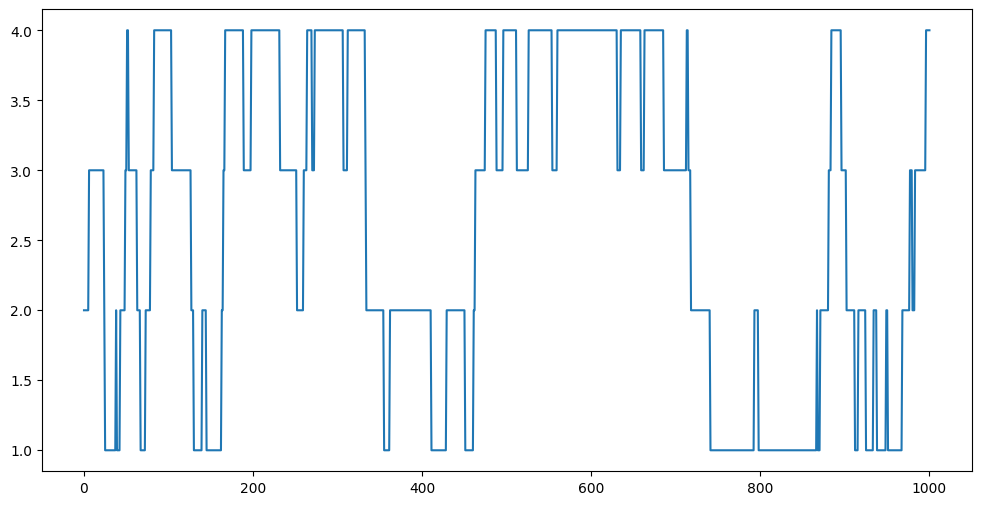

In [18]:
# Exemplo de passeio aleatório - Inspirado em https://www.geeksforgeeks.org/random-walk-implementation-python/

import random
import numpy as np
import matplotlib.pyplot as plt

# Probabilidade de mover para baixo ou para cima
prob = [0.05, 0.95]

# Definição da posição inicial
start = 2
positions = [start]

# Criação de pontos aleatórios
rr = np.random.random(1000)
downp = rr < prob[0]
upp = rr > prob[1]


for idownp, iupp in zip(downp, upp):
	down = idownp and positions[-1] > 1
	up = iupp and positions[-1] < 4
	positions.append(positions[-1] - down + up)

# Gráfico de um passeio aleatório em uma dimensão
plt.plot(positions)
plt.show()


In [19]:
np.round(rr,3)

array([0.819, 0.63 , 0.933, 0.758, 0.624, 0.999, 0.054, 0.658, 0.507,
       0.089, 0.485, 0.905, 0.77 , 0.412, 0.555, 0.842, 0.406, 0.566,
       0.675, 0.517, 0.575, 0.171, 0.1  , 0.009, 0.015, 0.539, 0.619,
       0.524, 0.443, 0.068, 0.621, 0.138, 0.786, 0.845, 0.248, 0.146,
       0.518, 0.999, 0.034, 0.268, 0.318, 0.69 , 0.951, 0.387, 0.444,
       0.824, 0.593, 0.521, 0.983, 0.49 , 0.961, 0.643, 0.036, 0.481,
       0.45 , 0.435, 0.63 , 0.515, 0.073, 0.788, 0.59 , 0.146, 0.017,
       0.293, 0.576, 0.88 , 0.048, 0.903, 0.895, 0.134, 0.542, 0.358,
       0.961, 0.241, 0.468, 0.231, 0.828, 0.366, 0.986, 0.888, 0.226,
       0.692, 0.964, 0.418, 0.595, 0.329, 0.739, 0.501, 0.896, 0.91 ,
       0.596, 0.435, 0.091, 0.69 , 0.907, 0.551, 0.428, 0.117, 0.22 ,
       0.679, 0.088, 0.966, 0.785, 0.006, 0.664, 0.338, 0.255, 0.571,
       0.752, 0.626, 0.333, 0.6  , 0.827, 0.346, 0.683, 0.414, 0.173,
       0.809, 0.525, 0.652, 0.295, 0.133, 0.442, 0.439, 0.568, 0.666,
       0.039, 0.719,

### Processos estocásticos estacionários

Um processo é estacionário se ele se desenvolver no tempo de modo que a escolha da origem não seja importante.

Em outras palavras, as características de $Z(t+\tau)$ são as mesmas de $Z(t)$.

### Processos normais (Gaussianos)

Um processo estocástico $Z = \{Z(t), t\in \mathcal{T}\}$ é dito ser Gaussiano se, para qualquer conjunto $t_1, t_2,\ldots, t_n $ de $\mathcal{T}$ as variáveis aleatórias $Z(t_1),\ldots, Z(t_n)$ têm distribuição normal n-variada.



### Séries Temporais


Considere uma série temporal $Z(t_1),Z(t_2),\ldots,Z(t_n)$ observada nos instantes $t_1,\ldots,t_n$, ou seja, uma realização ou trajetória de um processo estocástico. Temos interesse em

- Investigar o mecanismo gerador da série

- Fazer previsões para valores futuros da série

- Descrever o comportamento da série

- Procurar periodicidades relevantes nos dados



As séries temporais podem ser **contínuas**, quando as observações são feitas continuamente no tempo. Nesse caso,

$$\{Z (t) : t ∈ T \}, T = \{t : t_1 < t < t_2 \}.$$

Ou podem ser **discretas**, quando as observações são feitas em tempos específicos

$$\{Z (t) : t ∈ T \}, T = \{t_1 , . . . , t_n \}.$$




A partir daqui, adotaremos também a notação $\{Z_t\}$ para representar uma série temporal.

Séries contı́nuas podem ser discretizadas se os valores são registrados a certos intervalos de tempo.

Séries podem ter valores agregados ou acumulados em intervalos de tempo, e.g. exportações medidas mensalmente ou quantidade de chuva medida diariamente.

Algumas séries são inerentemente discretas, e.g. dividendos pagos por uma empresa aos seus acionistas em anos sucessivos.

A série temporal é multivariada se k variáveis são observadas a cada tempo $\{Z_{1t} , . . . , Z_{kt} , t ∈ T \}$. As séries correlacionadas devem ser analisadas conjuntamente e em cada tempo tem-se um vetor de observações.



# Tendência e Sazonalidade



Considere as observações $\{Z_t, t=1,\ldots,N\}$ de uma série temporal.

Podemos escrever um modelo de decomposição de $Z_t$ como uma soma de três componentes não-observáveis:

$$Z_t = T_t + S_t + a_t$$

em que

- $T_t$ representa uma componente de **tendência**

- $S_t$ representa uma componente de **sazonalidade**

- $a_t$ é uma **componente aleatória** (resíduos ou ruído), com média 0 e variância $\sigma^2_a$ .

Se $\{a_t\}$ for um ruído branco, então $Cov(a_t,a_s) = 0$ com $s\neq t$, mas podemos eventualmente relaxar essa suposição supondo $\{a_t\}$ um processo estacionário. Segue-se que, em geral, $\{Z_t\}$ é uma série não-estacionária.

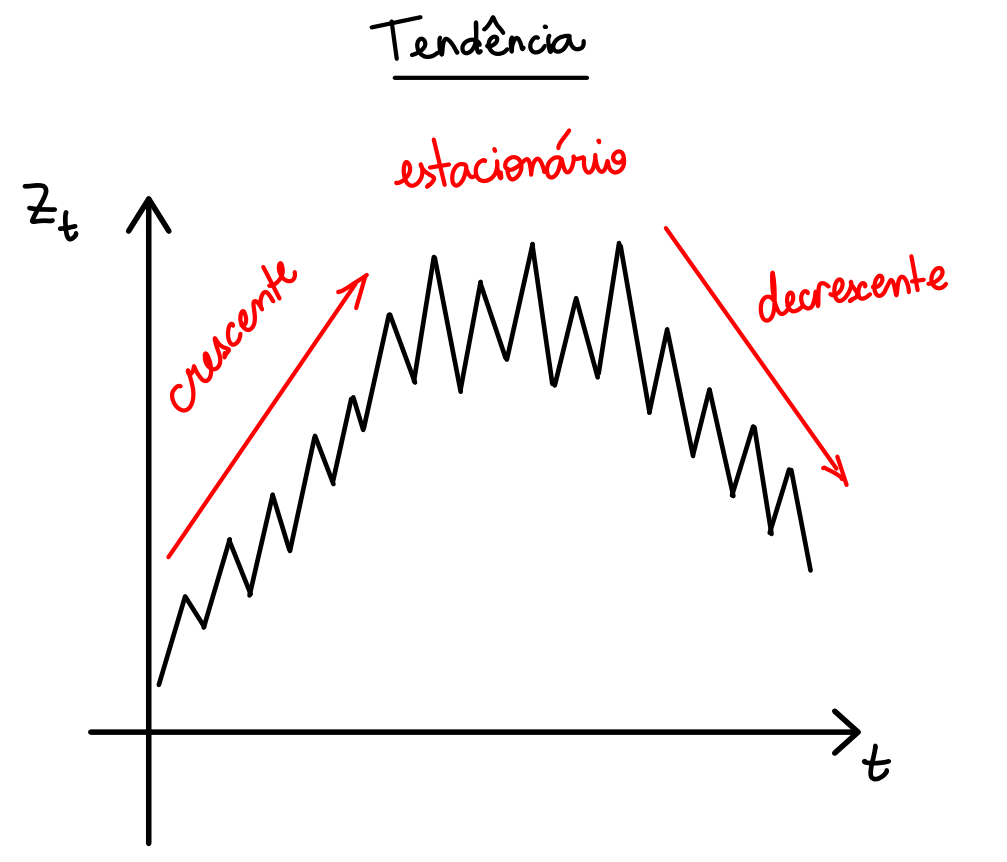

## Tendência

Suponha inicialmente que a componente sazonal $S_t$ não esteja presente. Um modelo inicial é

$$Z_t = T_t + a_t$$

em que $a_t$ é um ruído branco, com variância $\sigma^2_a$.



Queremos estimar $T_t$. Para isso, considere algumas possibilidades:

i. ajustar uma função no tempo, como um polinômio, uma exponencial ou outra função suave de $t$;

ii. suavizar (ou filtrar) os valores da série ao redor de um ponto, para estimar a tendência naquele ponto

iii. suavizar os valores da série através de sucessivos ajustes de retas de mínimos quadrados ponterados ('lowess')


Estimada a tendência, $\widehat{T}_t$, podemos obter a série ajustada para tendência ou livre de tendência

$$Y_t = Z_t - \widehat{T}_t$$

Para eliminar a tendência de uma série, também é possível considerar as diferenças. Normalmente para séries econômicas, a primeira diferença


$$\Delta Z_t = Z_t - Z_{t-1}$$ já é estacionária.



### Tendência polinomial

Suponha que

$$T_t = \beta_0+\beta_1t + \ldots +\beta_m t^m$$

onde o grau do polinômio $m$ é bem menor do que o número de observações N.

Pode-se utilizar o método de mínimos quadrados para estimar $\beta_0,\ldots,\beta_m$ e obter $\widehat{\beta}_0,\ldots,\widehat{\beta}_m$.

In [20]:
# Exemplo tendência polinomial - Carregando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


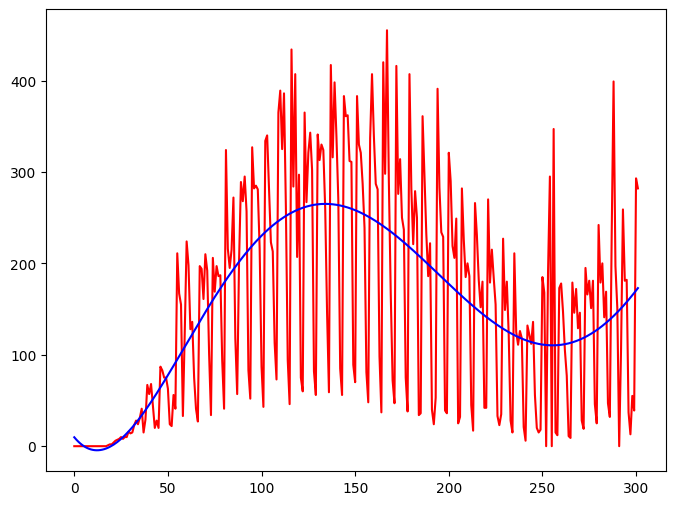

In [21]:
#Leitura dos dados

url = 'https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidSP.csv'

# Leitura via github
covidSP = pd.read_csv(url,index_col='date',parse_dates=True)

# Aqui não trabalharemos com as datas mas sim com um índice inteiro das observações
x = np.array(range(len(covidSP.index)))
y = np.array(covidSP['deaths'])

polynomial = np.polyfit(x, y, 5)
p5 = np.poly1d(polynomial)

xx = np.linspace(x.min(), x.max(), len(y))

plt.rcParams['figure.figsize'] = [8,6]

plt.plot(x,y,label="Real data",color="red") # Plota os dados
plt.plot(xx,p5(xx),label="Polinomio",color="blue") # Polinômio

## Sazonalidade

Comportamento da série temporal tende a se repetir a cada s perı́odos de tempo.

Por exemplo, para dados de COVID-19, os picos em geral ocorrem às terças-feiras e aos fins de semana os registros diminuem, dada a sistemática das notificações.

**Tipos de Sazonalidade**

- **Aditiva**. A série apresenta flutuações sazonais mais ou menos constantes não importando o nı́vel global da série.

- **Multiplicativa**. O tamanho das flutuações sazonais varia dependendo do nı́vel global da série.


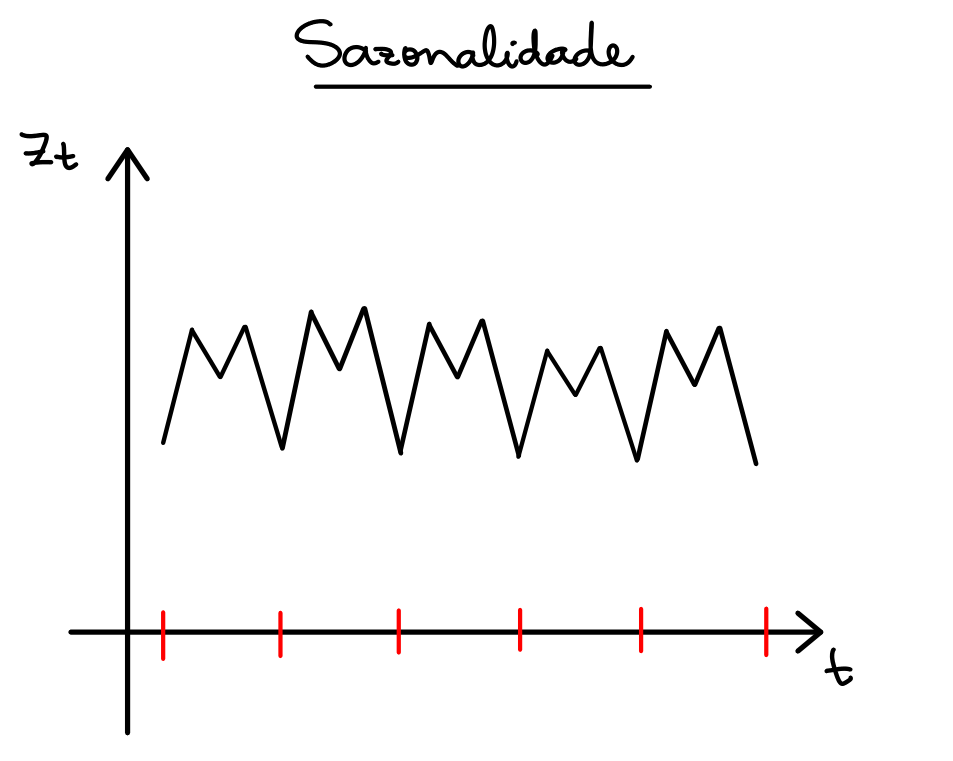

Considere as observações $\{Z_t, t=1,\ldots,N\}$ de uma série temporal.

Supondo que não existe tendência mas somente sazonalidade :

$$Z_t =  S_t + a_t$$

em que

- $S_t$ representa uma componente de **sazonalidade**

- $a_t$ é um ruído branco com média 0 e variância $\sigma^2_a$.

Se a sazonalidade for multiplicativa o modelo é definido como

$$Z_t =  S_t  a_t$$

**Métodos para estimar a sazonalidade**

Para obter a sazonalidade ajustada $\widehat{S_t}$, podemos utilizar diferentes métodos:

- **Método da regressão** (método determinístico) em que as covariáveis são variáveis periódicas, por exemplo seno, cosseno ou variáveis 'dummy', que são variáveis indicadoras  


- **Médias móveis** (método estocástico)

E então obtemos a série livre de sazonalidade (ou sazonalmente ajustada)


$$Y_t = Z_t - \widehat{S}_t, \mbox{  no caso aditivo, ou}$$


$$Y_t = Z_t / \widehat{S}_t \mbox{ no caso multiplicativo}$$

Aqui, nós usaremos a função [seasonal_decompose](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) do pacote [statsmodels](https://www.statsmodels.org/stable/index.html).

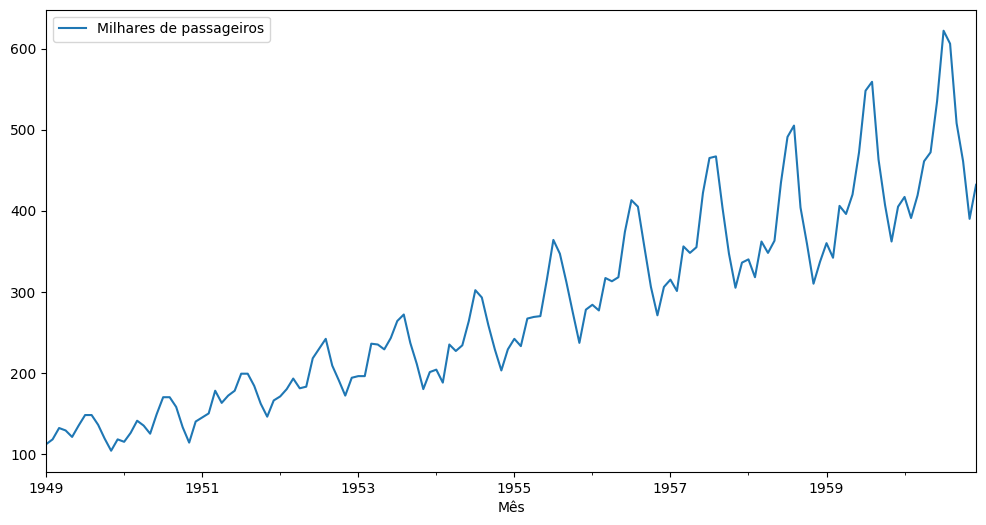

In [22]:
### Passageiros

# Agendamento de passageiros (em milhares) por mês na Pan Am nos Estados Unidos, observadas mensalmente no período de 1949-1960 (Brown, R. G. "Smoothing." Forecasting and Prediction of Discrete Time Series, 1963).
# A companhia usou os dados para prever a demanda futura e antes de programar compras e novas aeronaves e de treinar funcionários.

# Air Passengers: Passageiros aéreos
# Vamos ler os dados direto do github

url='https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/airline_passengers.csv'
passageiros = pd.read_csv(url, index_col=0,parse_dates=True)

passageiros.index = passageiros.index.to_period("M")

passageiros.plot(figsize=(12,6));

<Axes: xlabel='Mês'>

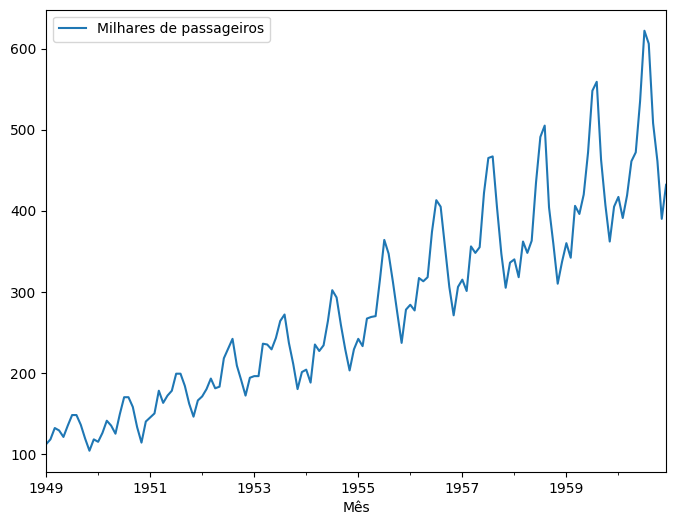

In [23]:
# Para essa análise, os dados faltantes devem ser excluídos!

passageiros = passageiros.dropna()

passageiros.plot()

# A sazonalidade é aditiva ou multiplicativa?


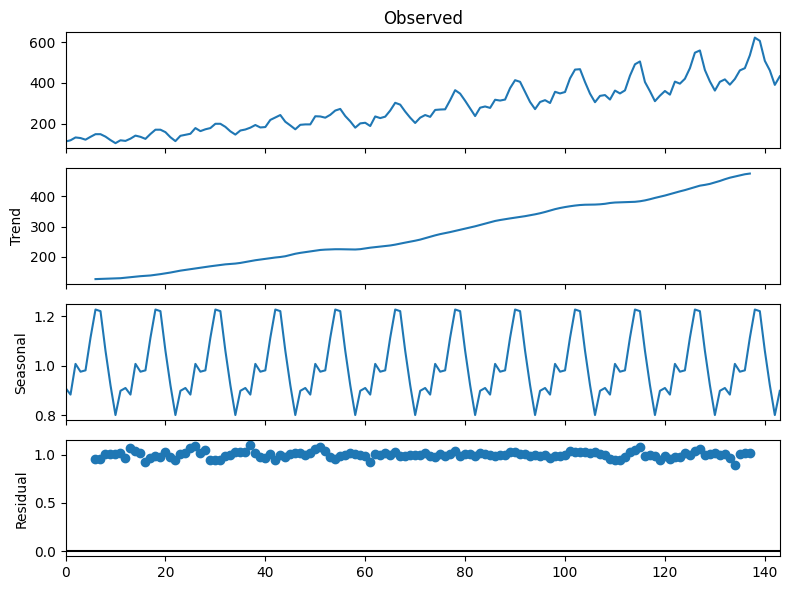

In [24]:
import statsmodels.api as sm

# Decomposição em tendência e sazonalidade

passag = np.array(passageiros['Milhares de passageiros'])

result = sm.tsa.seasonal_decompose(passag, model='multiplicative', period=12)


result.plot();


In [25]:
# Olhe para as componentes do objeto result

result.seasonal

array([0.91023037, 0.88362532, 1.00736629, 0.97590601, 0.98137803,
       1.11277583, 1.22655554, 1.21991097, 1.06049193, 0.92175724,
       0.80117808, 0.89882439, 0.91023037, 0.88362532, 1.00736629,
       0.97590601, 0.98137803, 1.11277583, 1.22655554, 1.21991097,
       1.06049193, 0.92175724, 0.80117808, 0.89882439, 0.91023037,
       0.88362532, 1.00736629, 0.97590601, 0.98137803, 1.11277583,
       1.22655554, 1.21991097, 1.06049193, 0.92175724, 0.80117808,
       0.89882439, 0.91023037, 0.88362532, 1.00736629, 0.97590601,
       0.98137803, 1.11277583, 1.22655554, 1.21991097, 1.06049193,
       0.92175724, 0.80117808, 0.89882439, 0.91023037, 0.88362532,
       1.00736629, 0.97590601, 0.98137803, 1.11277583, 1.22655554,
       1.21991097, 1.06049193, 0.92175724, 0.80117808, 0.89882439,
       0.91023037, 0.88362532, 1.00736629, 0.97590601, 0.98137803,
       1.11277583, 1.22655554, 1.21991097, 1.06049193, 0.92175724,
       0.80117808, 0.89882439, 0.91023037, 0.88362532, 1.00736

In [26]:
result.trend

array([         nan,          nan,          nan,          nan,
                nan,          nan, 126.79166667, 127.25      ,
       127.95833333, 128.58333333, 129.        , 129.75      ,
       131.25      , 133.08333333, 134.91666667, 136.41666667,
       137.41666667, 138.75      , 140.91666667, 143.16666667,
       145.70833333, 148.41666667, 151.54166667, 154.70833333,
       157.125     , 159.54166667, 161.83333333, 164.125     ,
       166.66666667, 169.08333333, 171.25      , 173.58333333,
       175.45833333, 176.83333333, 178.04166667, 180.16666667,
       183.125     , 186.20833333, 189.04166667, 191.29166667,
       193.58333333, 195.83333333, 198.04166667, 199.75      ,
       202.20833333, 206.25      , 210.41666667, 213.375     ,
       215.83333333, 218.5       , 220.91666667, 222.91666667,
       224.08333333, 224.70833333, 225.33333333, 225.33333333,
       224.95833333, 224.58333333, 224.45833333, 225.54166667,
       228.        , 230.45833333, 232.25      , 233.91

# Suavização e Alisamento exponencial



## Suavização

- A suavização permite que a tendência da série em um instante t possa ser estimada usando-se observações $Z_s$ com $s$ ao redor de $t$, por exemplo, usando as observações $Z_{t-n},Z_{t-n+1},\ldots, Z_{t+n}$ para estimar $T_t$.

- Procedimentos não paramétricos para aproximar localmente a série

- Transformação da série $Z_t$ em uma série $Z_t^{\star}$

Considere que as observações da série temporal $\{Z_t\}$ possam ser localmente decompostas em seu nível e mais um ruído aleatório

$$Z_t = \mu_t + a_t, \mbox{ para } t=1,\ldots, N$$

com $E(a_t)=0$ e $Var(a_t) = \sigma^2$ e $\mu_t$ é um parâmetro desconhecido, que pode variar lentamente com o tempo e que queremos estimar.



Alguns procedimentos de suavização:

- Médias móveis

- Medianas móveis

- Lowess

- Métodos de Holt-Winters




## Média móvel simples


Dadas as observações $Z_1,\ldots,Z_N$, a média móvel é dada por

$$Z_t^{\star} = M_t = \displaystyle{\frac{Z_t+Z_{t-1}+\ldots +Z_{t-(r+1)}}{r}},$$

ou

$$Z_t^{\star} = M_t = M_{t-1} + \displaystyle{\frac{Z_t-Z_{t-r}}{r}}$$



In [27]:
# Médias móveis para dados de passageiros aéreos

import pandas as pd
import numpy as np
%matplotlib inline

In [28]:
# Leitura dos dados

url = 'https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/airline_passengers.csv'

# Leitura via github
# Air Passengers: Passageiros aéreos
passageiros = pd.read_csv(url, index_col=0,parse_dates=True)

# Tirar dados faltantes pois influenciariam no cálculo da média móvel
passageiros = passageiros.dropna()

# OU poderia fazer simplesmente passageiros.dropna(inplace=True)

In [29]:
passageiros.head()

,Milhares de passageiros
Mês,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Podemos criar uma série para a média móvel simples usando a função mean em rolling, que usa janelas deslizantes.
[Veja a documentação do rolling do pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)




In [30]:
passageiros['MMS-6-meses'] = passageiros['Milhares de passageiros'].rolling(window=6).mean()
passageiros['MMS-12-meses'] = passageiros['Milhares de passageiros'].rolling(window=12).mean()

In [31]:
passageiros.head(15)

,Milhares de passageiros,MMS-6-meses,MMS-12-meses
Mês,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


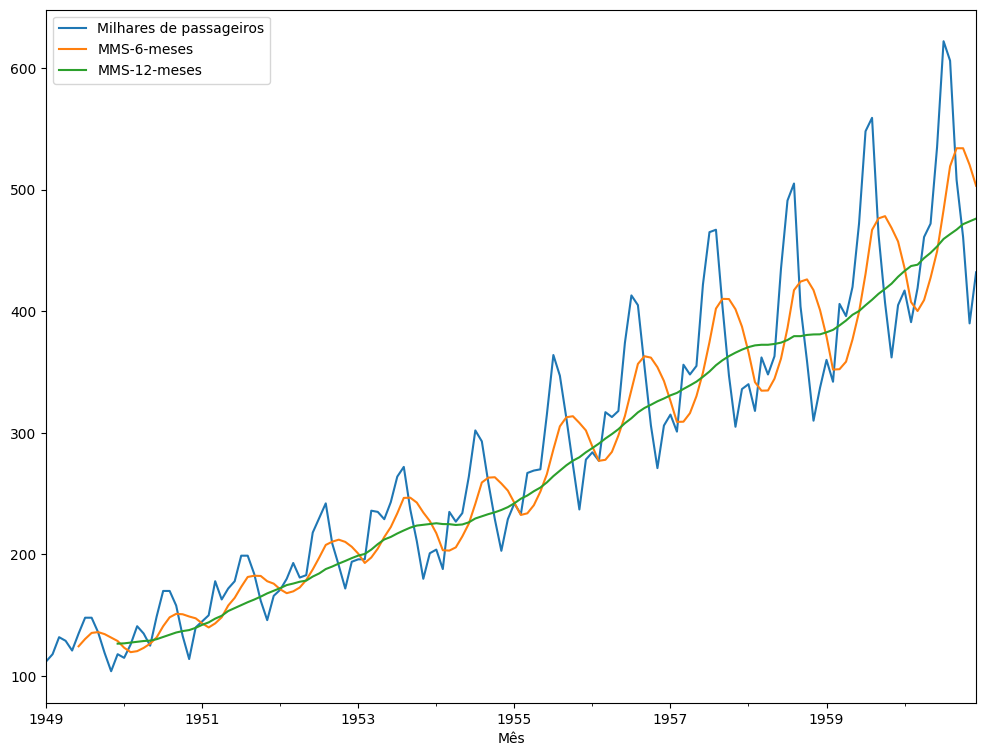

In [32]:
passageiros.plot(figsize=(12,9));

**Exercício:**

Crie um gráfico da mediana móvel. Quais as implicações?

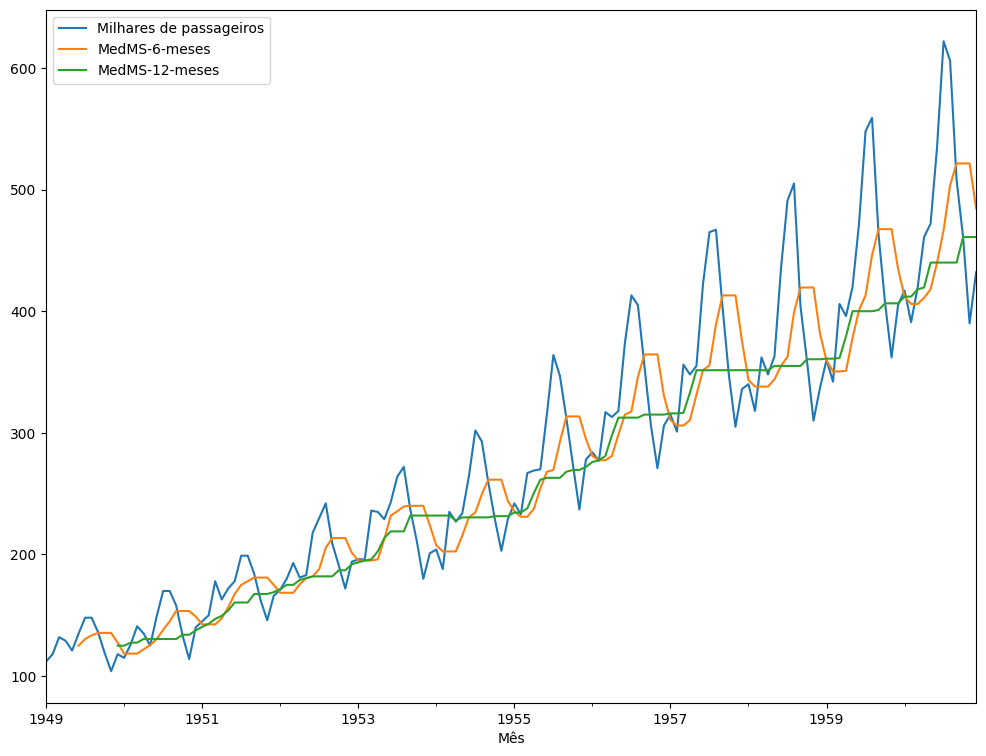

In [33]:
passageiros['MedMS-6-meses'] = passageiros['Milhares de passageiros'].rolling(window=6).median()
passageiros['MedMS-12-meses'] = passageiros['Milhares de passageiros'].rolling(window=12).median()

passageiros[['Milhares de passageiros','MedMS-6-meses','MedMS-12-meses']].plot(figsize=(12,9));

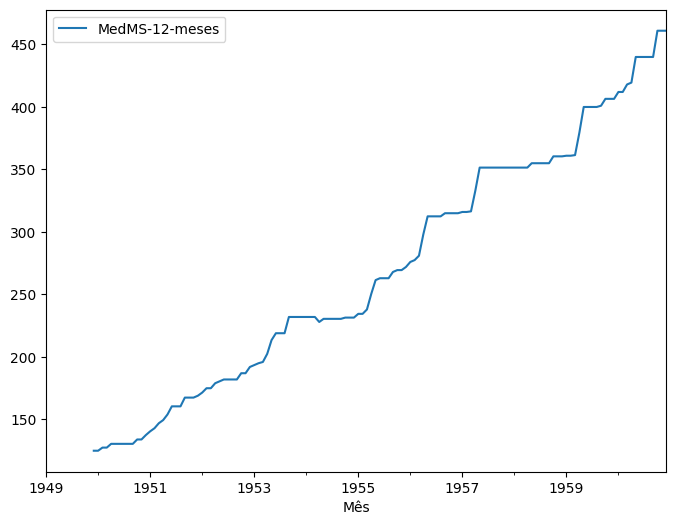

In [34]:
passageiros[['MedMS-12-meses']].plot(figsize=(8,6));

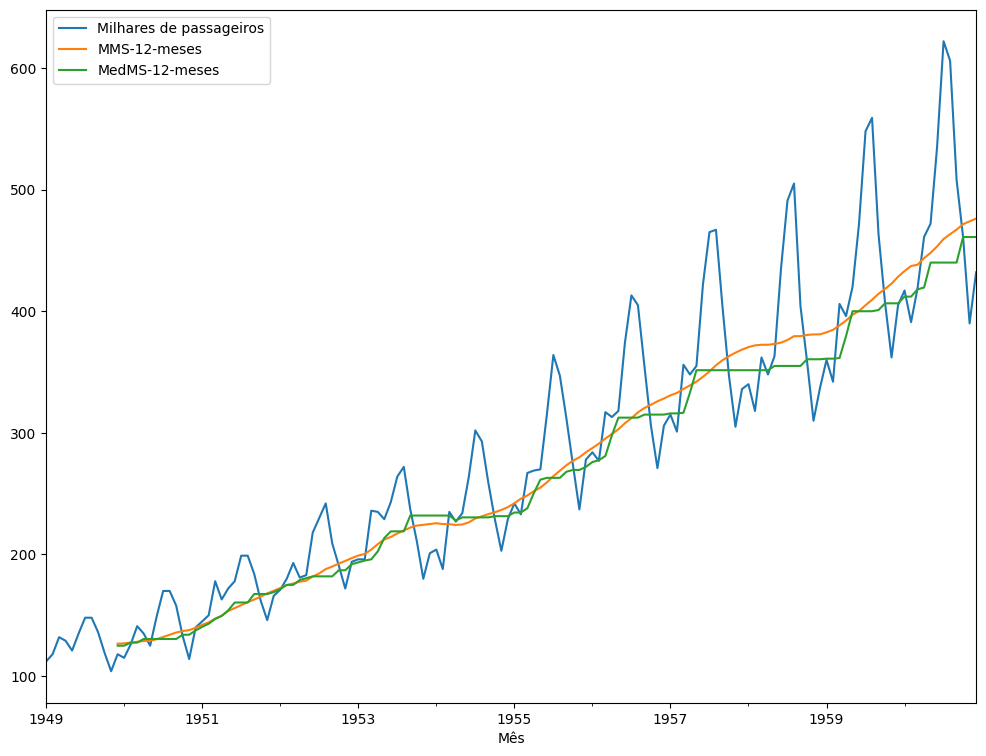

In [35]:
passageiros[['Milhares de passageiros','MMS-12-meses','MedMS-12-meses']].plot(figsize=(12,9));

## Média móvel exponencialmente ponderada  (MMEP)

As médias móveis simples têm algumas desvantagens:

- Janelas menores levarão a mais ruído, em vez de sinal.
- Ele nunca alcançará o pico ou vale máximo dos dados devido ao cálculo da média.
- Valores históricos extremos podem distorcer significativamente a MMS



Uma possível proposta para contornar esses problemas é a **média móvel exponencialmente ponderada**.

A MMEP permite reduzir o efeito de atraso da MMS e dará mais peso aos valores que ocorreram mais recentemente (aplicando mais peso aos valores mais recentes, portanto, o nome). A quantidade de peso aplicada aos valores mais recentes dependerá dos parâmetros reais usados na MMEP e do número de períodos determinados pelo tamanho da janela.


A MMEP é dada por

$$\overline{Z}_t = \alpha Z_t + (1-\alpha) Z_{t-1},$$

com $\overline{Z}_0=Z_1$;  $t=1,\ldots,N,$ e $\alpha$ é uma constante tal que $0\leq\alpha\leq 1$.



Uma representação alternativa mais geral da MMEP implementada em Python é

$\overline{Z}_t =  \displaystyle \frac{\sum\limits_{i=0}^{t-1} w_i Z_{t-i}}{\sum\limits_{i=0}^{t-1} w_i}$

Aqui, $Z_t$ é a entrada, $w_i$ é o peso aplicado (Note que os pesos podem ser diferentes de $i=0$ a $(t-1)$), e $\overline{Z}_t$ é a saída.

Agora a questão é, como podemos definir o peso $w_i$?

Isso pode ser feito mudando valores do parâmetro adjust no método .ewm (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html)

Quando <tt>adjust=True</tt> (default) as médias móveis ponderadas são calculadas usando pesos iguais a $w_i = (1 - \alpha)^i$

o que nos dá

$\overline{Z}_t = \displaystyle\frac{Z_t + (1 - \alpha)Z_{t-1} + (1 - \alpha)^2 Z_{t-2} + \ldots
+ (1 - \alpha)^{t-1} Z_{1}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^{t-1}}$

Quando <tt>adjust=False</tt> as médias móveis são calculadas da forma

$\begin{array}{ll}\overline{Z}_0 &= Z_1 \\
\overline{Z}_t &= (1 - \alpha) Z_{t-1} + \alpha Z_t,\end{array}$

o que é equivalente a usar os pesos

$w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{se } i < t \\
    (1 - \alpha)^i        & \text{se } i = t.
\end{cases}$

Quando adjust=True nós temos $\overline{Z}_0=Z_1$ e da última representação acima nós temos
$\overline{Z}_t=\alpha Z_t+(1−α)\overline{Z}_{t−1}$, portanto existe uma suposição que $Z_1$ não é um valor ordinário mas um momento exponencialmente ponderado das séries infinitas até aquele ponto.

Para o fator de suavização $\alpha$ tem-se que $0<\alpha≤1$ e é frequentemente mais fácil pensar ou em **span**, **centro de massa** ou **meia vida** de um momento exponencialmente ponderado

$\alpha =
 \begin{cases}
     \displaystyle\frac{2}{s + 1},               & \text{para span}\ s \geq 1\\
     \displaystyle\frac{1}{1 + c},               & \text{para centro de massa}\ c \geq 0\\
     \displaystyle 1 - \exp{\displaystyle(\frac{\log 0.5}{h})}, & \text{para meia-vida}\ h > 0
 \end{cases}$

* **Span** (período) corresponde ao que é comumente chamado uma "média móvel exponencialmente ponderada em N dias".
* **Centro de massa** tem uma interpretação física e pode ser pensado em termos do span: $c=(s−1)/2$
* **Meia-vida** é o período de tempo para o peso exponencial se reduzir pela metade.
* **Alpha** especifica o fator de suavização diretamente.

Temos que passar precisamente um dos parâmetros acima para a função .ewm(). Usaremos span=12.

In [36]:
passageiros['MMEP12'] = passageiros['Milhares de passageiros'].ewm(span=12,adjust=False).mean()

In [37]:
passageiros

,Milhares de passageiros,MMS-6-meses,MMS-12-meses,MedMS-6-meses,MedMS-12-meses,MMEP12
Mês,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,NaN,NaN,112.923077
1949-03-01,132,NaN,NaN,NaN,NaN,115.857988
1949-04-01,129,NaN,NaN,NaN,NaN,117.879836
1949-05-01,121,NaN,NaN,NaN,NaN,118.359861
...,...,...,...,...,...,...
1960-08-01,606,519.166667,463.333333,503.5,440.0,494.898619
1960-09-01,508,534.000000,467.083333,521.5,440.0,496.914216
1960-10-01,461,534.000000,471.583333,521.5,461.0,491.388952


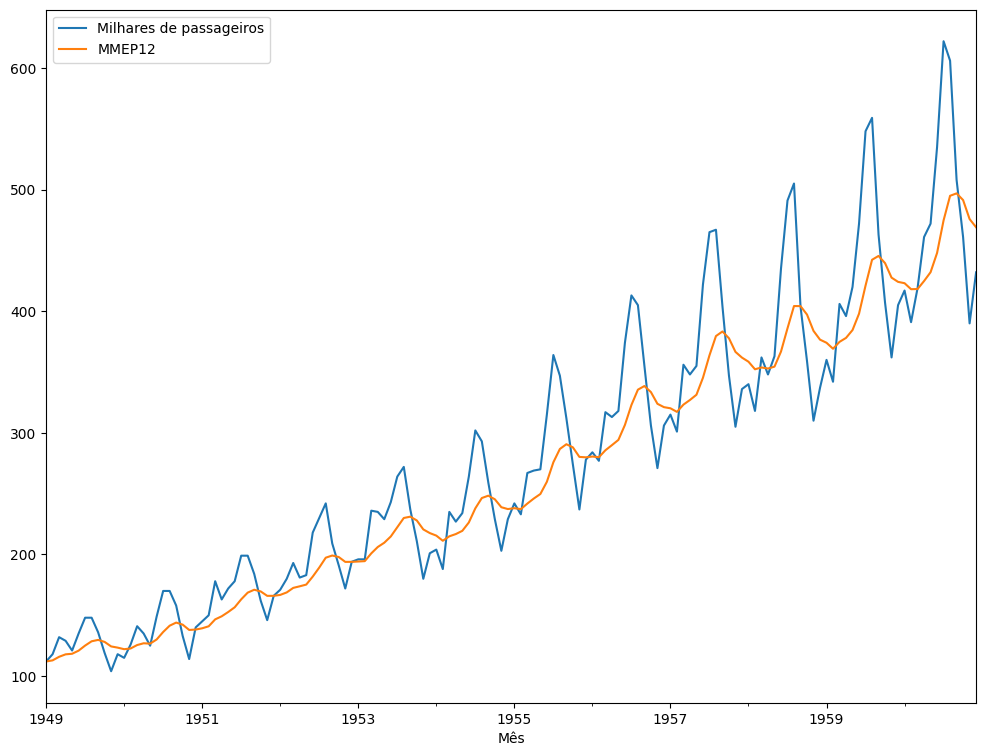

In [38]:
passageiros[['Milhares de passageiros','MMEP12']].plot(figsize=(12,9));

## Comparando MMS com MMEP

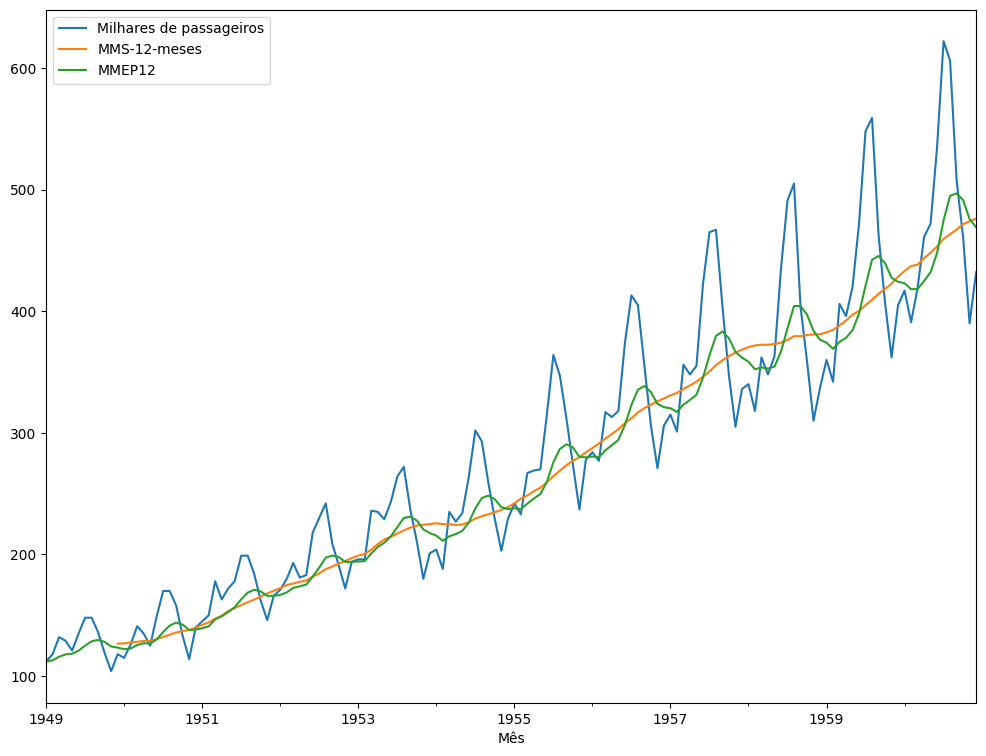

In [39]:
passageiros[['Milhares de passageiros','MMS-12-meses','MMEP12']].plot(figsize=(12,9)).autoscale(axis='x',tight=True);

**Exercício**

Aplique os métodos de média móvel (7 dias) e média exponencialmente ponderada (span=7) aos dados de mortes registradas por COVID-19 no estado de SP.


In [40]:
# Leitura dos dados

url = 'https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidSP.csv'

# Leitura via github
covidSP = pd.read_csv(url,index_col='date',parse_dates=True)


In [41]:
covidSP.head()

,confirmed,deaths
date,,
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,1,0
2020-02-29,0,0
2020-03-01,0,0


In [42]:
covidSP['MMS-7-dias'] = covidSP['deaths'].rolling(window=7).mean()
covidSP['MMEP-7'] = covidSP['deaths'].ewm(span=7,adjust=False).mean()

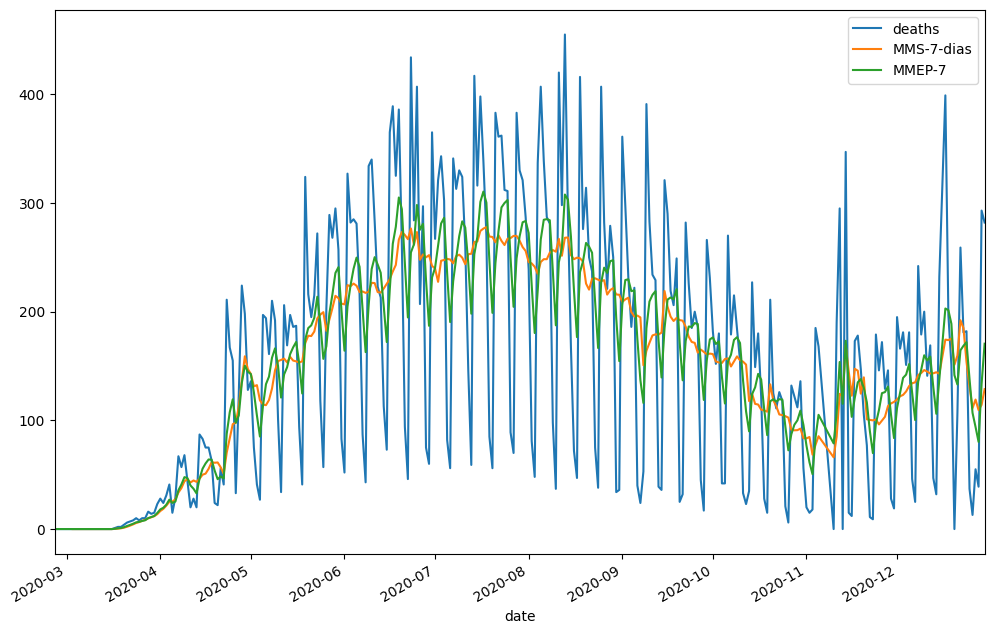

In [43]:
covidSP[['deaths','MMS-7-dias','MMEP-7']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

**Exercício**
Repita para 14 dias e span=14.
Compare esses resultados com os gráficos com 5 dias e span=5.
Você nota alguma relação com esses parâmetros e a suavidade da curva?

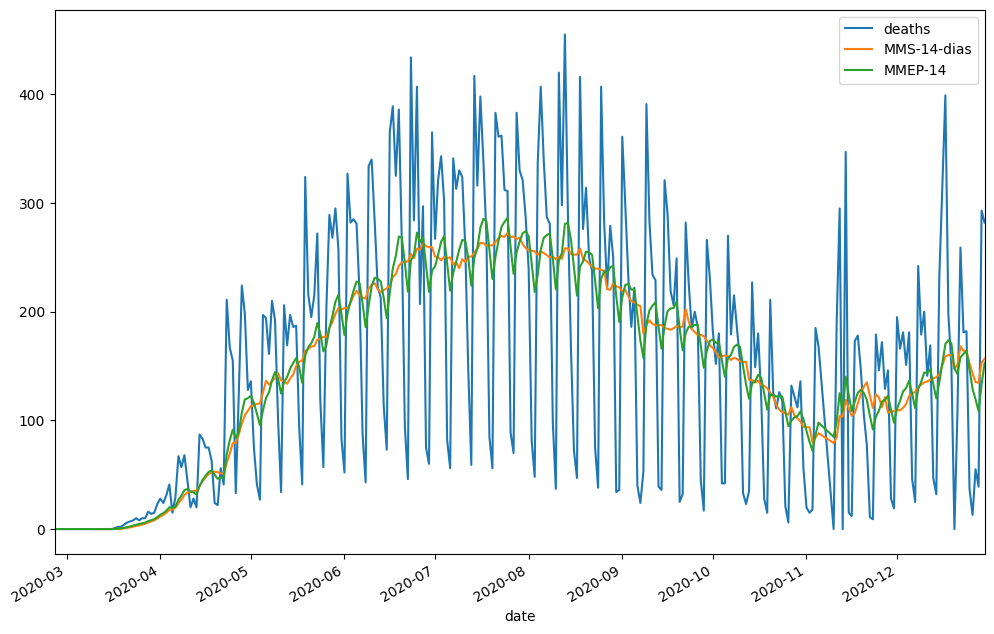

In [44]:
covidSP['MMS-14-dias'] = covidSP['deaths'].rolling(window=14).mean()
covidSP['MMEP-14'] = covidSP['deaths'].ewm(span=14,adjust=False).mean()
covidSP[['deaths','MMS-14-dias','MMEP-14']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

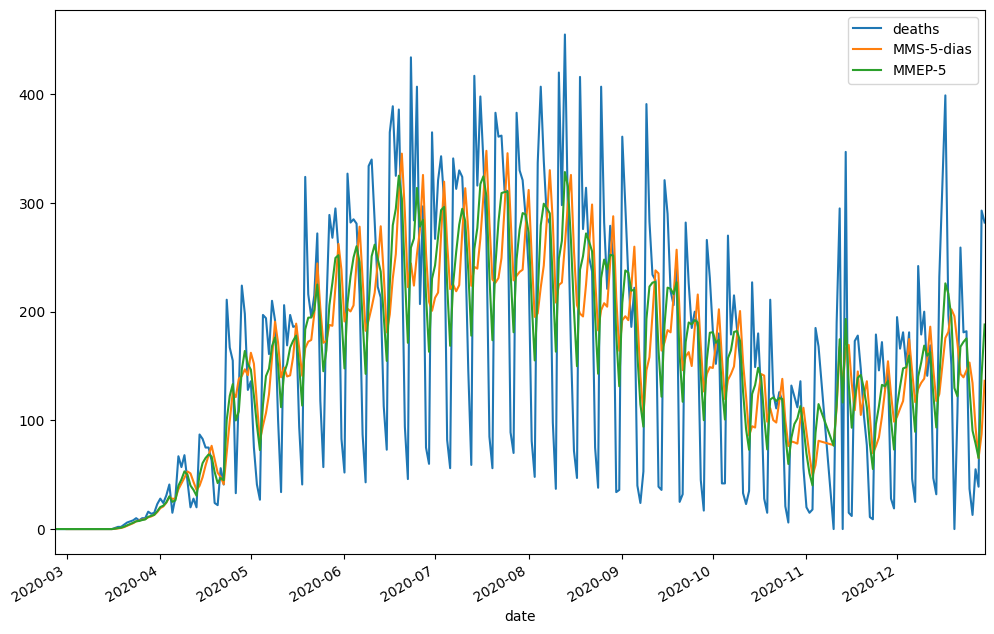

In [45]:
covidSP['MMS-5-dias'] = covidSP['deaths'].rolling(window=5).mean()
covidSP['MMEP-5'] = covidSP['deaths'].ewm(span=5,adjust=False).mean()
covidSP[['deaths','MMS-5-dias','MMEP-5']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

## Algumas outras séries que iremos tratar neste curso


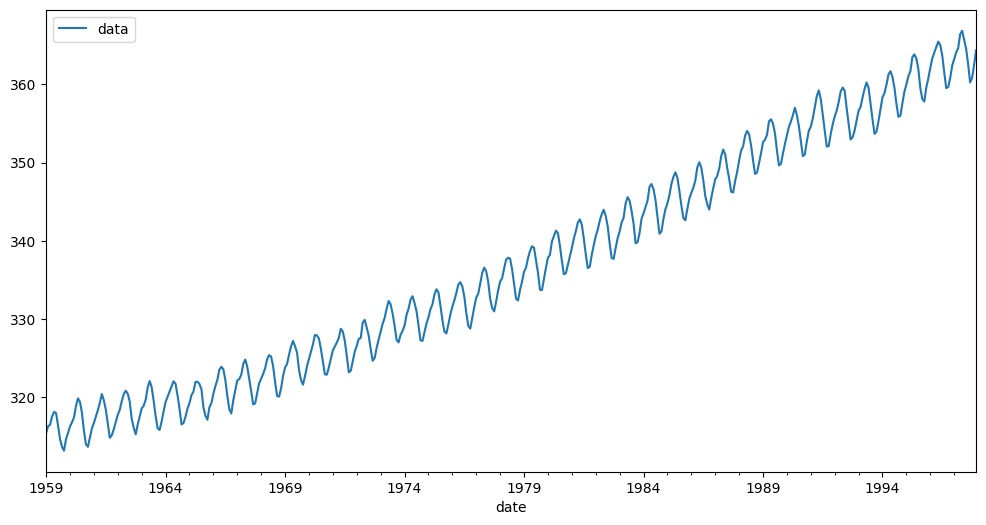

In [46]:
# Exemplo - CO2

# CO2 Concentrações atmosfericas de CO2 (em ppm) janeiro/1953 a dezembro/1997
# Dados disponíveis em https://github.com/mjuez/pytsdatasets/ e
# https://github.com/cibelerusso/Aprendizado-Dinamico/tree/main/Data

url='https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/co2.csv'
co2 = pd.read_csv(url, index_col=0, parse_dates=True)
co2.index = co2.index.to_period("M")

co2.plot(figsize=(12,6));

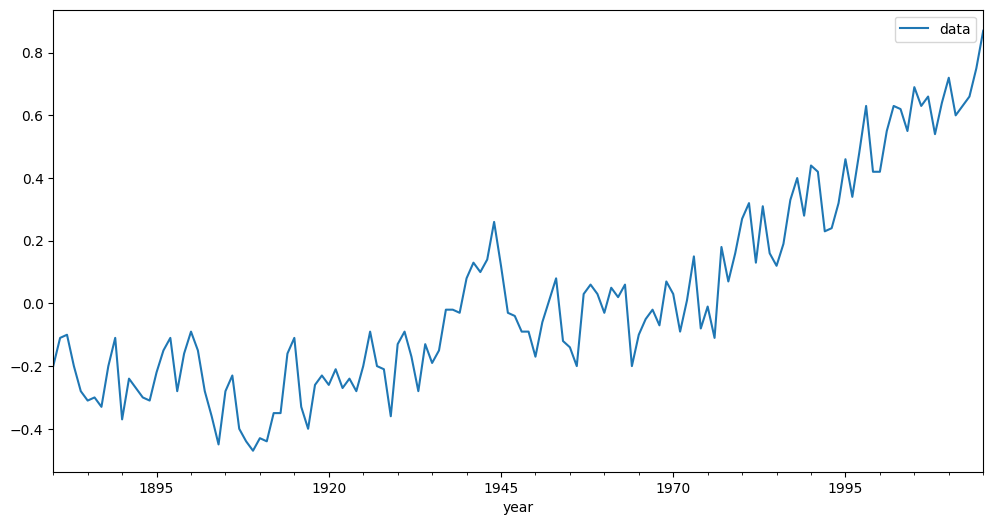

In [47]:
# Temperatura global

# Diferenças na média de temperatura global.
# Dados disponíveis em https://github.com/mjuez/pytsdatasets/ e
# https://github.com/cibelerusso/Aprendizado-Dinamico/tree/main/Data

url='https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/globaltemp.csv'
globaltemp = pd.read_csv(url, index_col=0, parse_dates=True)
globaltemp.index = globaltemp.index
globaltemp.plot(figsize=(12,6));


In [48]:
globaltemp

,data
year,
1880-01-01,-0.20
1881-01-01,-0.11
1882-01-01,-0.10
1883-01-01,-0.20
1884-01-01,-0.28
...,...
2011-01-01,0.60
2012-01-01,0.63
2013-01-01,0.66


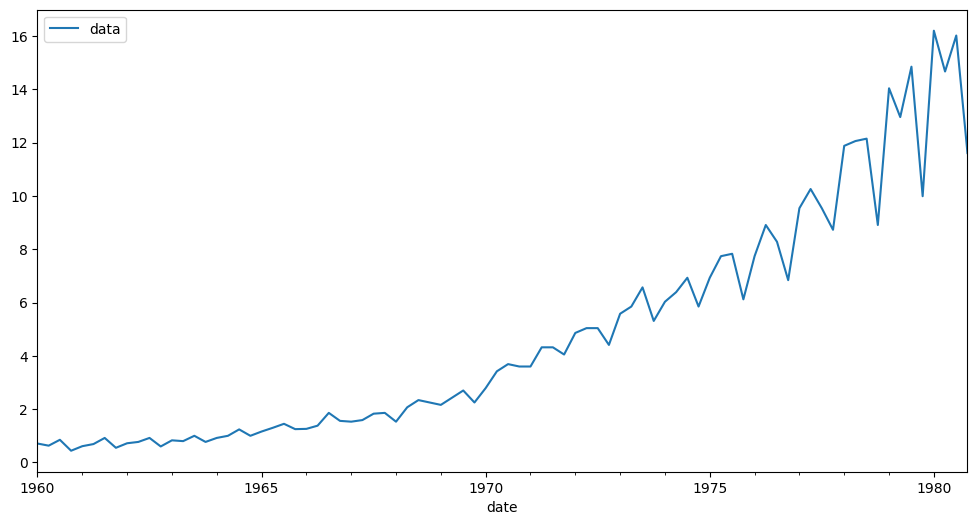

In [49]:
# Jhonson & Johnson

# Ganhos quadrimestrais da Jhonson & Jhonson
# Dados disponíveis em https://github.com/mjuez/pytsdatasets/ e
# https://github.com/cibelerusso/Aprendizado-Dinamico/tree/main/Data

url='https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/jj.csv'
jj = pd.read_csv(url, index_col=0, parse_dates=True)
jj.index = jj.index.to_period("Q")
jj.plot(figsize=(12,6));


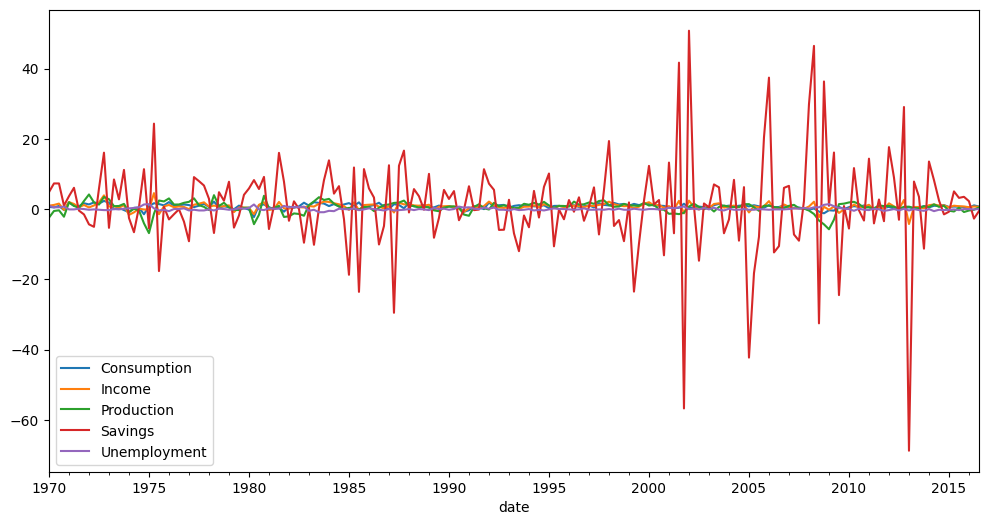

In [50]:
# US Change 1970 a 2016
# Fontes:
# Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2018.
# Dados disponíveis em https://github.com/robjhyndman/fpp2-package e
# https://github.com/cibelerusso/Aprendizado-Dinamico/tree/main/Data
# Percentage changes in quarterly personal consumption expenditure, personal disposable income, production, savings and the unemployment rate for the US, 1960 to 2016.

uschange = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/uschange.csv', index_col=0,
                       parse_dates=True)
uschange.index = uschange.index.to_period("Q")
uschange.plot(figsize=(12,6));

In [51]:
uschange

,Consumption,Income,Production,Savings,Unemployment
date,,,,,
1970Q1,0.615986,0.972261,-2.452700,4.810312,0.9
1970Q2,0.460376,1.169085,-0.551525,7.287992,0.5
1970Q3,0.876791,1.553271,-0.358708,7.289013,0.5
1970Q4,-0.274245,-0.255272,-2.185455,0.985230,0.7
1971Q1,1.897371,1.987154,1.909734,3.657771,-0.1
...,...,...,...,...,...
2015Q3,0.664970,0.801663,0.380606,3.180930,-0.3
2015Q4,0.561680,0.740063,-0.845546,3.482786,0.0
2016Q1,0.404682,0.519025,-0.417930,2.236534,0.0


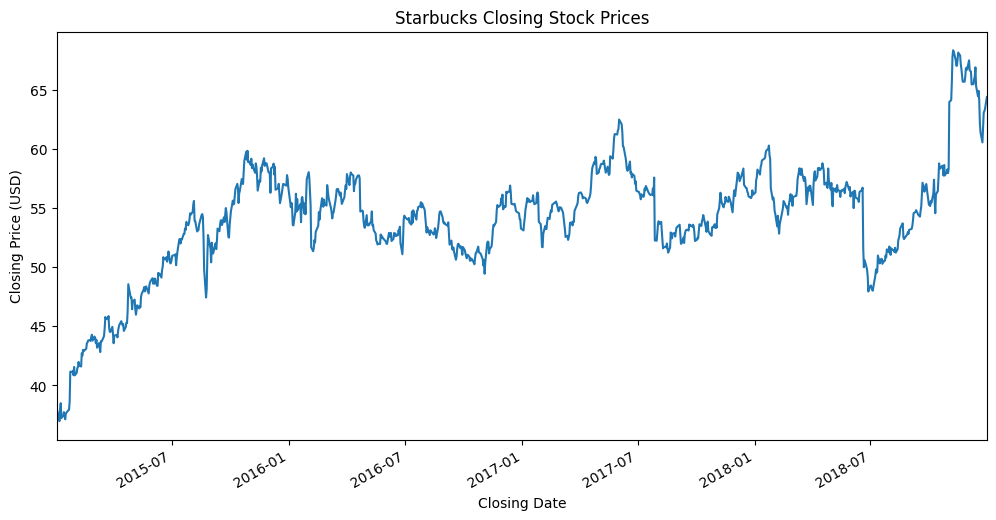

In [52]:
# Preço de fechamento e volume negociado de ações da Starbucks entre 2015 e 2018
# SBUX dataset
# Mais informações em https://medium.com/analytics-vidhya/pull-open-source-stock-price-history-using-python-d67ad0e3efe2
# Disponível em https://github.com/cibelerusso/Aprendizado-Dinamico/tree/main/Data

url='https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/starbucks.csv'
df = pd.read_csv(url,index_col='Date',parse_dates=True)

title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);


Você pode repetir a decomposição em tendência e sazonalidade para algumas dessas séries, e mesmo utilizar janelas deslizantes para observar as médias móveis simples e exponencialmente ponderadas.

Na próxima semana daremos continuidade às técnicas de suavização com os **Métodos de Suavização Holt-Winters**, e falaremos também sobre estacionariedade e outros aspectos de séries temporais.